In [1]:
import getfem as gf
import pyvista as pv

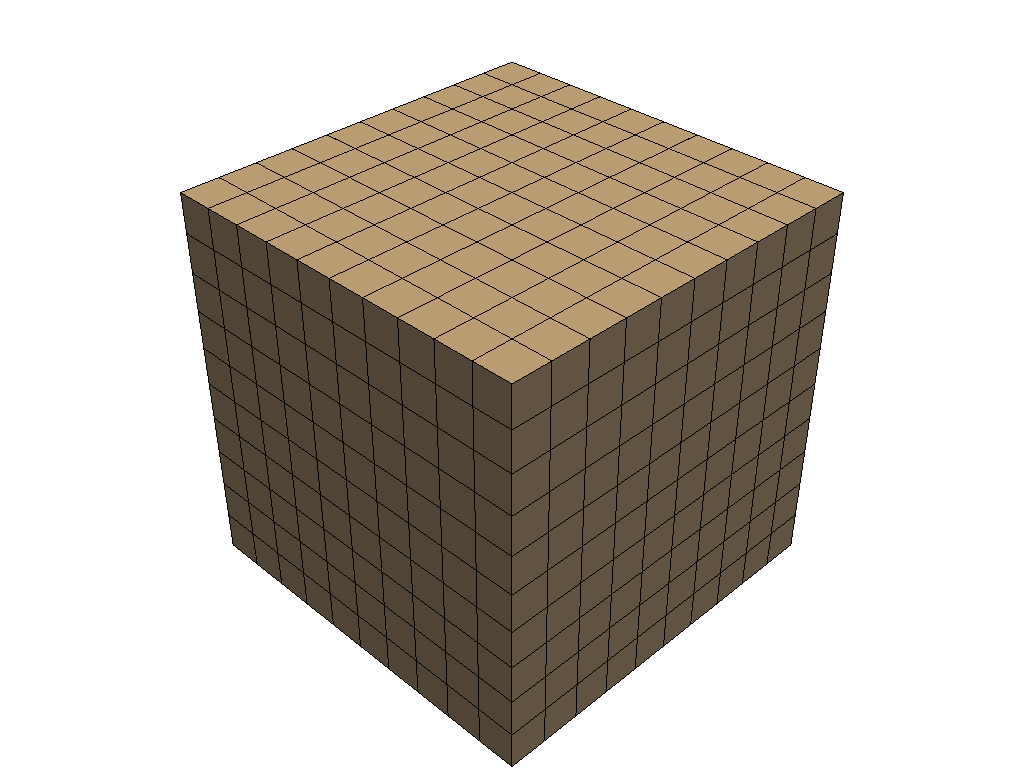

In [2]:
m = gf.Mesh("empty", 3)

for x in range(10):
    for y in range(10):
        for z in [0, 10]:
            m.add_convex(
                gf.GeoTrans("GT_PRODUCT(GT_QK(1, 1), GT_QK(1, 1))"),
                [[x, x+1, x, x+1], [y, y, y+1, y+1], [z, z, z, z]],
            )

for x in range(10):
    for z in range(10):
        for y in [0, 10]:
            m.add_convex(
                gf.GeoTrans("GT_PRODUCT(GT_QK(1, 1), GT_QK(1, 1))"),
                [[x, x+1, x, x+1], [y, y, y, y], [z, z, z+1, z+1]],
            )

for y in range(10):
    for z in range(10):
        for x in [0, 10]:
            m.add_convex(
                gf.GeoTrans("GT_PRODUCT(GT_QK(1, 1), GT_QK(1, 1))"),
                [[x, x, x, x], [y, y+1, y, y+1], [z, z, z+1, z+1]],
           )


m.translate([-5.0, -5.0, -5.0])
m.export_to_vtk("m.vtk")
mesh = pv.read("m.vtk")
mesh.plot(show_edges=True)

In [3]:
assert m.nbpts() == 11*11*2+11*11*2-11*4+11*11*2-11*4-9*4

In [4]:
pts = m.pts()

In [5]:
pts

array([[-5., -4., -5., ...,  5., -5.,  5.],
       [-5., -5., -4., ...,  4.,  4.,  4.],
       [-5., -5., -5., ...,  3.,  4.,  4.]])

In [6]:
import numpy as np
radius = np.sqrt(pts[0]**2 + pts[1]**2 + pts[2]**2)
ratio = 10.0/radius

In [7]:
m.set_pts(pts*ratio)

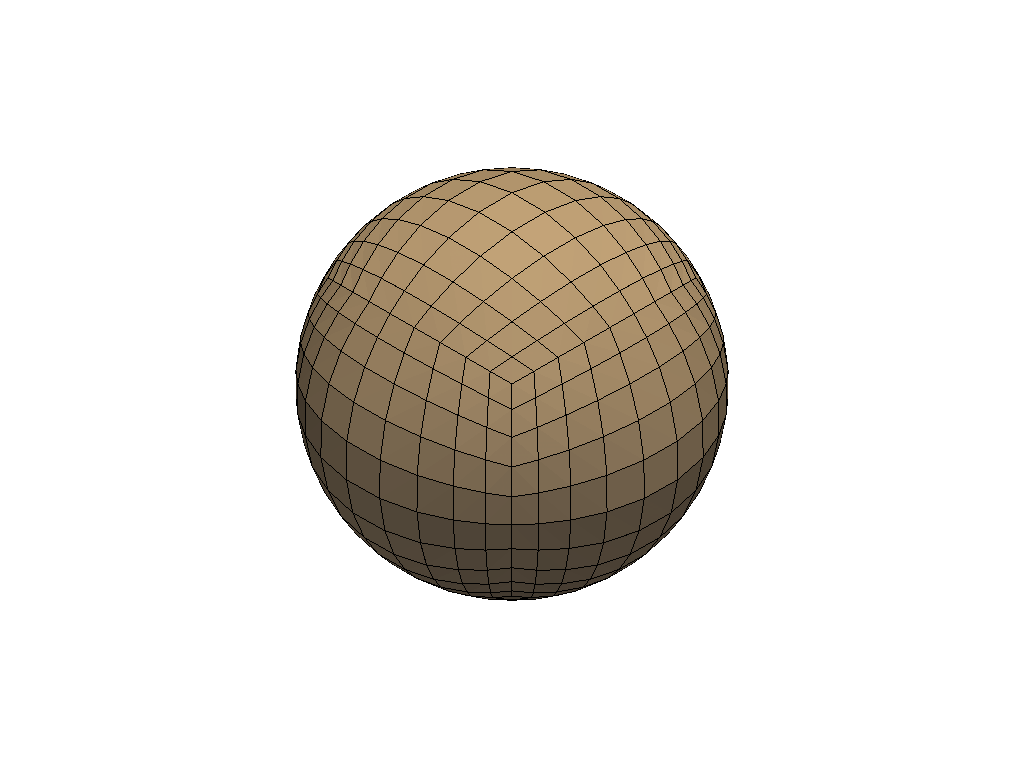

In [8]:
m.export_to_vtk("m.vtk")
mesh = pv.read("m.vtk")
mesh.plot(show_edges=True)